
















##Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

base_path = '/content/drive/MyDrive/PTDL/data_and_code'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[văn bản liên kết](https://)##Install pyspark for colab
Pyspark is not supported for colab

In [ ]:
%pip install pyspark

## Create spark session


In [ ]:
#import findspark
from pyspark.sql import SparkSession

def spark_session(app_name):
    spark = SparkSession.builder \
        .appName(app_name)\
        .getOrCreate()
    # To make sure that we are working with the correct version of Spark
    print("Running PySpark version: ", spark.version)
    return spark

spark = spark_session('assignment')

Running PySpark version:  3.5.1


In [ ]:
dataset_path = base_path+ '/dataset/youtube_trending/CAvideos.csv' #dataset path string
data = spark.read.csv(dataset_path, header=True)

In [ ]:
# Đếm số lượng phần tử trong DataFrame
num_elements = data.count()

# Hiển thị số lượng phần tử
print("Số lượng phần tử trong DataFrame là:", num_elements)

data = data.na.drop()
data = data.filter(data["category_id"].cast("int").isNotNull())


num_elements = data.count()

# Hiển thị số lượng phần tử
print("Số lượng phần tử trong DataFrame sau khi loại bỏ các giá trị none là:", num_elements)

Số lượng phần tử trong DataFrame là: 45560
Số lượng phần tử trong DataFrame sau khi loại bỏ các giá trị none là: 39586


## Read dataset


## Show data sample and print schema

In [ ]:
data.show()


+-----------+-------------+----------------------+--------------------+-----------+--------------------+------------------------------+--------+-------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|                 title|       channel_title|category_id|        publish_time|                          tags|   views|  likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+----------------------+--------------------+-----------+--------------------+------------------------------+--------+-------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|n1WpP7iowLc|     17.14.11|  Eminem - Walk On ...|          EminemVEVO|         10|2017-11-10T17:00:...|          "Eminem"|"Walk"|"...|17158579| 787425|   43420|       1258

In [ ]:
data.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



Chuyển đổi kiểu dữ liệu các cột từ bị sai kiểu dữ liệu

In [ ]:
from pyspark.sql.functions import col
data = data.withColumn("category_id", col("category_id").cast("integer"))
data = data.withColumn("views", col("views").cast("integer"))
data = data.withColumn("likes", col("likes").cast("integer"))
data = data.withColumn("dislikes", col("dislikes").cast("integer"))
data = data.withColumn("comment_count", col("comment_count").cast("integer"))


## Data configulation

##Data Visualization

Tóm tắt dữ liệu bằng summary

In [ ]:
# Tóm tắt dữ liệu
data_summary = data.summary()

# Hiển thị thông tin tóm tắt
data_summary.show()

+-------+-----------+-------------+--------------------+-----------------+------------------+--------------------+--------------------+------------------+------------------+------------------+-----------------+--------------------+--------------------+--------------------+----------------------+--------------------+
|summary|   video_id|trending_date|               title|    channel_title|       category_id|        publish_time|                tags|             views|             likes|          dislikes|    comment_count|      thumbnail_link|   comments_disabled|    ratings_disabled|video_error_or_removed|         description|
+-------+-----------+-------------+--------------------+-----------------+------------------+--------------------+--------------------+------------------+------------------+------------------+-----------------+--------------------+--------------------+--------------------+----------------------+--------------------+
|  count|      39586|        39586|           

In [ ]:


# # Group data by category and count the number of videos
# pandas_data = data.toPandas()
# category_counts = pandas_data['category_id'].value_counts()

# # Use Matplotlib to create a bar chart
# import matplotlib.pyplot as plt

# plt.figure(figsize=(100, 60))  # Set figure size
# category_counts.plot(kind='bar', color='skyblue')
# plt.xlabel('Category ID')
# plt.ylabel('Number of Videos')
# plt.title('Number of Videos per Category')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.tight_layout()
# plt.show()


Biểu đồ lượng view theo ngày

In [ ]:
# from pyspark.sql.functions import to_date


# # Chọn một khoảng thời gian cụ thể
# start_date = "2017-11-14"
# end_date = "2017-11-30"

# # Chuyển định dạng của trending_date sang định dạng ngày-tháng-năm
# data = data.withColumn("trending_date", to_date(col("trending_date"), "yy.dd.MM"))

# # Lọc dữ liệu theo khoảng thời gian đã chọn
# filtered_data = data.filter((col("trending_date") >= start_date) & (col("trending_date") <= end_date))

# # Nhóm dữ liệu theo ngày và tính tổng số lượng views cho mỗi ngày
# views_by_date = filtered_data.groupBy("trending_date").sum("views").orderBy("trending_date").collect()

# # Tạo danh sách các ngày và tổng số lượng views
# dates = [row["trending_date"] for row in views_by_date]
# views = [row["sum(views)"] for row in views_by_date]

# # Vẽ biểu đồ đường
# plt.plot(dates, views)
# plt.xlabel("Date")
# plt.ylabel("Total Views")
# plt.title("Total Views Over Time")
# plt.xticks(rotation=45)
# plt.show()

Biểu đồ tròn (pie plot)

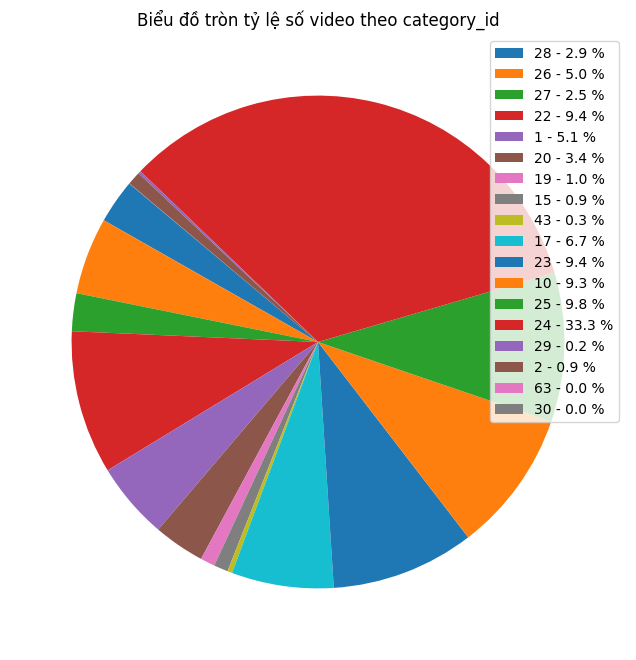

In [ ]:
import matplotlib.pyplot as plt


# Sử dụng groupBy và count để đếm số lượng video cho mỗi category_id
category_counts = data.groupBy('category_id').count().collect()

# Chuyển đổi kết quả thành một dictionary với category_id là key và số lượng video là value
category_counts_dict = {row['category_id']: row['count'] for row in category_counts}

# Tạo list chứa số lượng video cho mỗi category_id và list chứa nhãn cho biểu đồ
video_counts = list(category_counts_dict.values())
category_labels = list(category_counts_dict.keys())

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
patches, texts = plt.pie(video_counts, startangle=140, textprops={'color': "white"})

# Tạo chú thích cho biểu đồ
percent_labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(category_labels, [i/sum(video_counts)*100 for i in video_counts])]
plt.legend(patches, percent_labels, loc="best")

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ tròn tỷ lệ số video theo category_id')

# Hiển thị biểu đồ
plt.show()

Biểu đồ lượng view theo tháng

In [ ]:
# from pyspark.sql.functions import year
# from pyspark.sql.functions import month


# # Chọn năm cụ thể bạn muốn xem
# year_of_interest = 2018

# # Lọc dữ liệu chỉ chứa các dòng thuộc năm bạn quan tâm
# data_for_year = data.filter(year("trending_date") == year_of_interest)
# # Tính toán tổng số lượt xem theo tháng
# views_by_month = data_for_year.withColumn("trending_month", month("trending_date")) \
#                     .groupBy("trending_month").sum("views") \
#                     .orderBy("trending_month").collect()

# # Tạo danh sách các tháng và số lượng lượt xem tương ứng
# months = [row["trending_month"] for row in views_by_month]
# views = [row["sum(views)"] for row in views_by_month]

# # Tạo biểu đồ đường
# plt.plot(months, views)
# plt.xlabel("Month")
# plt.ylabel("Total Views")
# plt.title("Total Views Over Months")
# plt.xticks(range(1, 13))  # Đặt ticks cho các tháng từ 1 đến 12
# plt.show()

Top 5 sử dụng join,agg

In [ ]:
from pyspark.sql.functions import max
from pyspark.sql.functions import sum


# Tìm ngày gần nhất cho mỗi video_id
latest_dates = data.groupBy("video_id").agg(max("trending_date").alias("latest_date"))

# Kết hợp lại với dữ liệu gốc để lấy video_id có ngày gần nhất
latest_videos = data.join(latest_dates, (data["video_id"] == latest_dates["video_id"]) & (data["trending_date"] == latest_dates["latest_date"]))

# Sắp xếp dữ liệu theo cột "likes" theo thứ tự giảm dần và chỉ lấy 5 hàng đầu tiên
top_5_likes = latest_videos.orderBy(data["likes"].desc()).limit(5)

# Hiển thị kết quả
print("Top 5 likes")
top_5_likes.show()

# Sắp xếp dữ liệu theo cột "views" theo thứ tự giảm dần và chỉ lấy 5 hàng đầu tiên
top_5_views = latest_videos.orderBy(data["views"].desc()).limit(5)

# Hiển thị kết quả
print("Top 5 views")
top_5_views.show()

# Sắp xếp dữ liệu theo cột "dislikes" theo thứ tự giảm dần và chỉ lấy 5 hàng đầu tiên
top_5_dislikes = latest_videos.orderBy(data["dislikes"].desc()).limit(5)

# Hiển thị kết quả
print("Top 5 dislikes")
top_5_dislikes.show()

Top 5 likes
+-----------+-------------+-------------------------+--------------------+-----------+--------------------+------------------------+---------+-------+--------+-------------+--------------------+-----------------+----------------+----------------------+-------------------------+-----------+-----------+
|   video_id|trending_date|                    title|       channel_title|category_id|        publish_time|                    tags|    views|  likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|              description|   video_id|latest_date|
+-----------+-------------+-------------------------+--------------------+-----------+--------------------+------------------------+---------+-------+--------+-------------+--------------------+-----------------+----------------+----------------------+-------------------------+-----------+-----------+
|7C2z4GqqS5E|   2018-05-23|BTS (방탄소년단) 'FAKE...|             ibighit|         1

Biểu đồ đường view sử dụng hàm linespace()

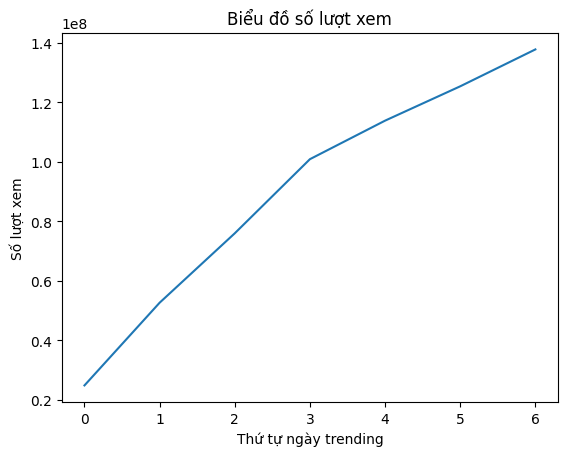

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lọc ra các dòng có video_id là 'FlsCjmMhFmw'
filtered_data = data.filter(data.video_id == 'FlsCjmMhFmw').orderBy('trending_date')

# Thu thập danh sách các giá trị 'views' của các dòng lấy được
views = filtered_data.select('views').rdd.flatMap(lambda x: x).collect()

# Tạo dãy giá trị trục x từ 0 đến len(views) - 1
x = np.linspace(0, len(views) - 1, len(views))

# Vẽ biểu đồ line
plt.plot(x, views)
plt.title('Biểu đồ số lượt xem')
plt.xlabel('Thứ tự ngày trending')
plt.ylabel('Số lượt xem')
plt.show()

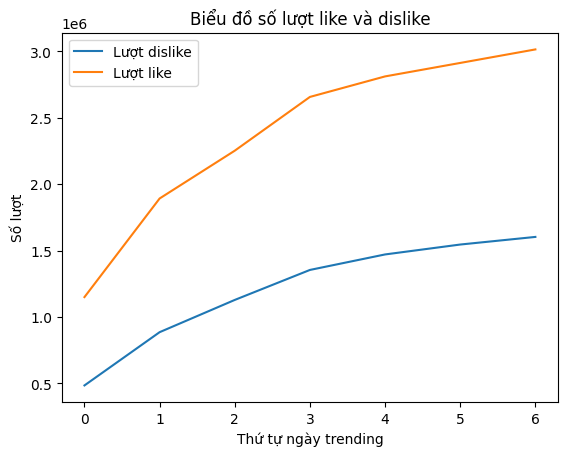

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lọc ra các dòng có video_id là 'FlsCjmMhFmw'
filtered_data = data.filter(data.video_id == 'FlsCjmMhFmw')

# Sắp xếp kết quả theo trường 'trending_date'
sorted_data = filtered_data.orderBy('trending_date')
# Thu thập danh sách các giá trị 'dislikes' và 'likes' của các dòng lấy được
dislikes = sorted_data.select('dislikes').rdd.flatMap(lambda x: x).collect()
likes = sorted_data.select('likes').rdd.flatMap(lambda x: x).collect()

# Tạo dãy giá trị trục x từ 0 đến len(views) - 1
x = np.linspace(0, len(dislikes) - 1, len(dislikes))

# Vẽ biểu đồ line
plt.plot(x, dislikes, label='Lượt dislike')
plt.plot(x, likes, label='Lượt like')
plt.title('Biểu đồ số lượt like và dislike')
plt.xlabel('Thứ tự ngày trending')
plt.ylabel('Số lượt')
plt.legend()
plt.show()

Biểu đồ phân bổ  (Scatter plot)

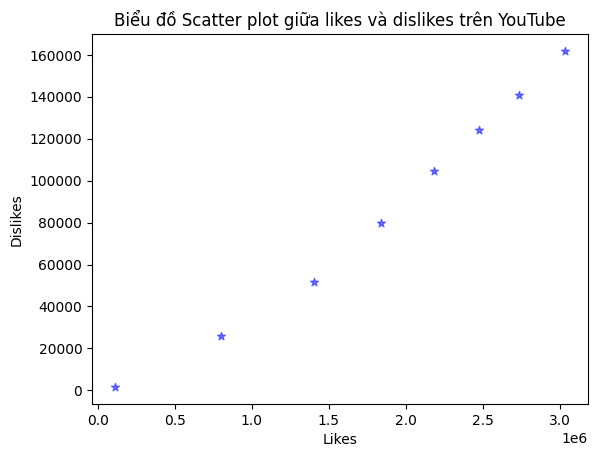

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Số lượng dòng trong bộ dữ liệu
num_rows = data.count()

# Lọc ra các dòng có video_id là 'FlsCjmMhFmw'
filtered_data = data.filter(data.video_id == 'VYOjWnS4cMY')

# Sắp xếp kết quả theo trường 'trending_date'
sorted_data = filtered_data.orderBy('trending_date')
likes = sorted_data.select('likes').rdd.flatMap(lambda x: x).collect()
dislikes = sorted_data.select('dislikes').rdd.flatMap(lambda x: x).collect()

# Vẽ biểu đồ scatter plot
plt.scatter(likes, dislikes, color='blue', marker='*', alpha=0.5)

# Đặt tên cho các trục và tiêu đề của biểu đồ
plt.title('Biểu đồ Scatter plot giữa likes và dislikes trên YouTube')
plt.xlabel('Likes')
plt.ylabel('Dislikes')

# Hiển thị biểu đồ
plt.show()

Biểu đồ cột (bar plot)

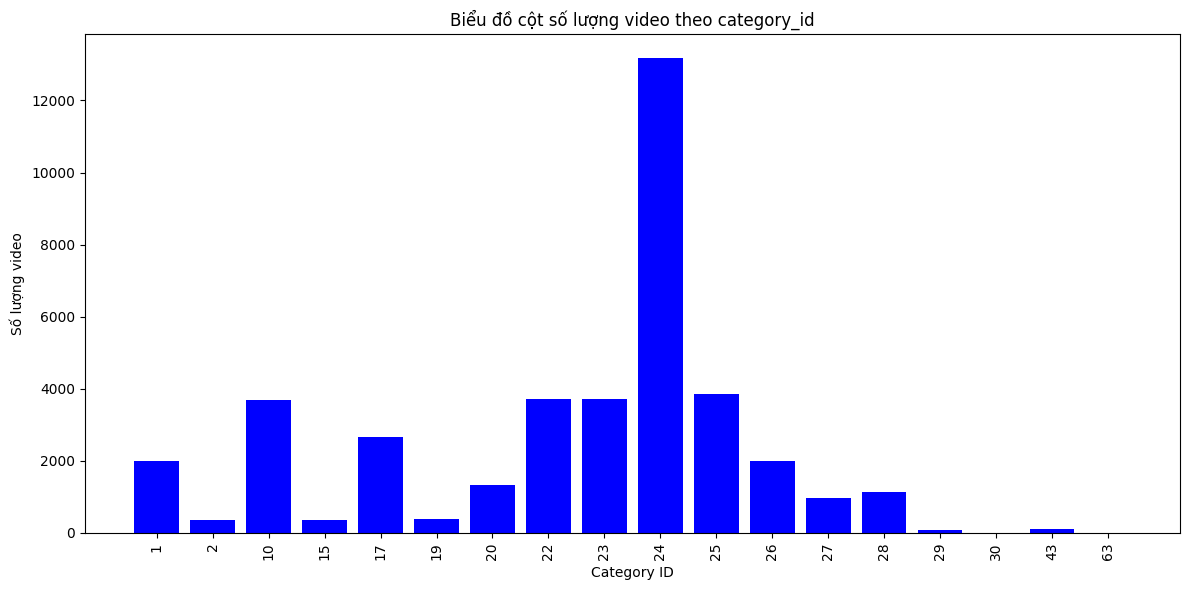

In [ ]:
import matplotlib.pyplot as plt

# Sử dụng groupBy và count để đếm số lượng video cho mỗi category_id
category_counts = data.groupBy('category_id').count().collect()

# Chuyển đổi kết quả thành một dictionary với category_id là key và số lượng video là value
category_counts_dict = {row['category_id']: row['count'] for row in category_counts}

# Sắp xếp dữ liệu theo category_id tăng dần
sorted_category_counts = sorted(category_counts_dict.items())

# Tạo list chứa số lượng video cho mỗi category_id và list chứa nhãn cho biểu đồ
category_labels, video_counts = zip(*sorted_category_counts)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(range(len(category_labels)), video_counts, color='blue')
plt.xticks(range(len(category_labels)), category_labels, rotation=90)

# Đặt tiêu đề và tên trục của biểu đồ
plt.title('Biểu đồ cột số lượng video theo category_id')
plt.xlabel('Category ID')
plt.ylabel('Số lượng video')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Biểu đồ thể hiện view của các danh mục theo ngày

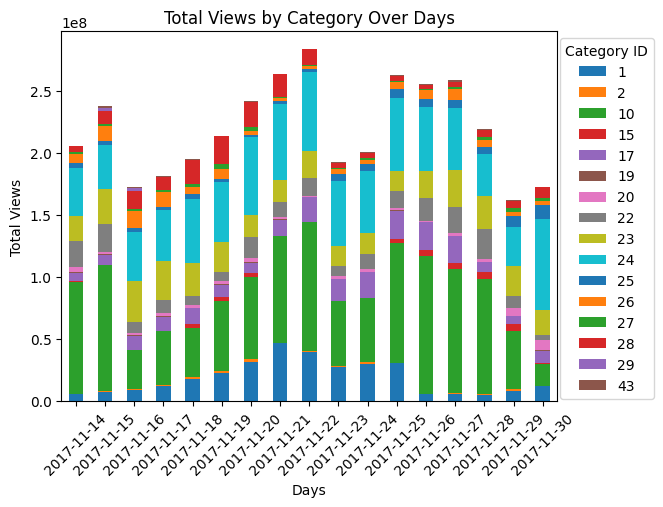

In [ ]:
# Import các hàm cần thiết
from pyspark.sql.functions import sum, col
from pyspark.sql.types import IntegerType

# Chọn một khoảng thời gian cụ thể
start_date = "2017-11-14"
end_date = "2017-11-30"

# Chuyển định dạng của trending_date sang định dạng ngày-tháng-năm
data = data.withColumn("trending_date", to_date(col("trending_date"), "yy.dd.MM"))

# Lọc dữ liệu theo khoảng thời gian đã chọn
filtered_data = data.filter((col("trending_date") >= start_date) & (col("trending_date") <= end_date))
# Chọn chỉ những cột bạn muốn giữ
selected_data = filtered_data.select("trending_date", "category_id", "views")

# Áp dụng pivot() trên DataFrame đã chọn
pivot_data = selected_data.groupBy("trending_date").pivot("category_id").agg(sum("views"))

# Áp dụng orderBy để sắp xếp dữ liệu theo ngày tăng dần
pivot_data_sorted = pivot_data.orderBy("trending_date", ascending=True)

# Chuyển dữ liệu về Pandas DataFrame để vẽ biểu đồ
pivot_df = pivot_data_sorted.toPandas()

# Vẽ biểu đồ cột
pivot_df.plot(kind="bar", x="trending_date", stacked=True)
plt.xlabel("Days")
plt.ylabel("Total Views")
plt.title("Total Views by Category Over Days")
plt.xticks(rotation=45)
plt.legend(title="Category ID", loc="upper center", bbox_to_anchor=(1.1, 1), ncol=1)
plt.show()

In [ ]:
from bokeh.plotting import figure, show, output_notebook, output_file, save
#dataframe_pandas = dataframe_spark.collect()
dataframe_pandas = data.toPandas()
#output_file('scatter_plot.html')
output_notebook()
# Assuming 'views' and 'likes' columns in dataframe_pandas
p = figure(title="Video Views vs Likes (2017-11-14)", x_axis_label="Views", y_axis_label="Likes")
p.circle(dataframe_pandas['views'], dataframe_pandas['likes'], size=10, color="blue", alpha=0.6)
#save(p)
show(p)


In [ ]:
# Assuming 'category_id' column exists in dataframe_pandas
video_count_per_category = dataframe_pandas['category_id'].value_counts()
from bokeh.plotting import figure, show, output_notebook
output_notebook()
# Use a bar chart function for visualization
x_range = video_count_per_category.index.astype(str).tolist()
p = figure(
    x_range=x_range,  # List of category IDs
    height=300,
    title="Number of Videos per Category (2017-11-14)",
    toolbar_location=None,  # Remove toolbar for cleaner visuals (optional)
    tools=""  # Hide zooming/panning tools (optional)
)

# Create vertical bars with category names on x-axis and video count on y-axis
p.vbar(
    x=video_count_per_category.index,
    top=video_count_per_category.values,
    width=0.8,
    legend_label="Video Count",
    bottom=0,  # Set bottom to 0 for starting bars from the axis
    color='skyblue'  # Set bar color (optional)
)

# Customize axis labels
p.xaxis.axis_label = "Category ID"
p.yaxis.axis_label = "Video Count"

# Display the chart
show(p)


In [ ]:
%pip install bokeh

In [ ]:
pip install --upgrade bokeh


In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.io import output_file, show
from bokeh.models import Tabs, Panel
from bokeh.plotting import figure

#dataframe_pandas = dataframe_spark.collect()
dataframe_pandas = data.toPandas()
output_notebook()

# Assuming 'views' and 'likes' columns in dataframe_pandas
p = figure(title="Video Views vs Likes (2017-11-14)", x_axis_label="Views", y_axis_label="Likes")
p.circle(dataframe_pandas['views'], dataframe_pandas['likes'], size=10, color="blue", alpha=0.6)

p2 = figure(title="Video Views vs Dislikes (2017-11-14)", x_axis_label="Views", y_axis_label="Dislikes")
p2.circle(dataframe_pandas['views'], dataframe_pandas['dislikes'], size=10, color="blue", alpha=0.6)

tab1 = Panel(child=p, title='tab1')
tab2 = Panel(child=p2, title='tab2')
 # Create tab by putting panels into it
tab_layout = Tabs(tabs=[tab1,tab2])
 # Show the plot
show(tab_layout)

AttributeError: unexpected attribute 'child' to Panel, possible attributes are anchor, context_menu, css_classes, css_variables, elements, height, js_event_callbacks, js_property_callbacks, name, position, styles, stylesheets, subscribed_events, syncable, tags, visible or width

In [ ]:
# Import the required modules
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from bokeh.models.widgets import Tabs
from bokeh.models.widgets import Panel
 # Import iris flower dataset as pandas DataFrame
from bokeh.sampledata.iris import flowers as df
 # Output to notebook
output_notebook()
 # Instantiate a figure
fig1 = figure(plot_width = 300, plot_height = 300)
fig2 = figure(plot_width = 300, plot_height = 300)
 # Create scatter marker plot by render the circles
fig1.circle(df['petal_length'], df['sepal_length'], size=8, color =
 "green", alpha = 0.5)
fig2.circle(df['petal_length'], df['sepal_width'], size=8, color = "blue",
 alpha = 0.5)
 # Create panels
tab1 = Panel(child=fig1, title='tab1')
tab2 = Panel(child=fig2, title='tab2')
 # Create tab by putting panels into it
tab_layout = Tabs(tabs=[tab1,tab2])
 # Show the plot
show(tab_layout)